In [259]:
import sympy as sp
from sympy.physics.quantum import Bra, Ket
from sympy import Matrix
from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.gate import HadamardGate,CNotGate, IdentityGate
from sympy.physics.quantum.qapply import qapply
from sympy import eye
from sympy import Abs
from sympy import sqrt
from UnitaryFunction import buildUnitaryMatrix, format_matrice
sp.init_printing()

In [260]:
#definition des états
ket0 = Matrix([1,0])
ket1 = Matrix([0,1])
plus = Matrix([1/sqrt(2),1/sqrt(2)])
minus = Matrix([1/sqrt(2),-1/sqrt(2)])

α = sp.Symbol("α")
β = sp.Symbol("β")
ϕ = α * ket0 + β * ket1 # Matrix([α,β])

α1 = sp.Symbol("α1", complex=True)
β1 = sp.Symbol("β1", complex=True)
ψ1 = α1 * ket0 + β1 * ket1 # Matrix([α,β])

α2 = sp.Symbol("α2", complex=True)
β2 = sp.Symbol("β2", complex=True)
ψ2 = α2 * ket0 + β2 * ket1 # Matrix([α,β])

α3 = sp.Symbol("α3", complex=True)
β3 = sp.Symbol("β3", complex=True)
ψ3 = α3 * ket0 + β3 * ket1 # Matrix([α,β])

In [261]:
I=sp.eye(2)
π=sp.pi
i=sp.I
X=sp.Matrix([[0,1], [1,0]]) #Pauli
σx=X
Y=sp.Matrix([[0,-i], [i,0]])
Z=sp.Matrix([[1,0], [0,-1]])

H=sp.Matrix([[1/sp.sqrt(2),1/sp.sqrt(2)], [1/sp.sqrt(2),-1/sp.sqrt(2)]])

S=sp.Matrix([[1,0], [0,-i]])
T=sp.Matrix([[1,0], [0,sp.exp(-i*π/4)]])


# rotation by theta around y
def Ry(θ):
    return sp.Matrix([[sp.cos(θ/2),sp.sin(θ/2)], [-sp.sin(θ/2),sp.cos(θ/2)]])

# rotation by alpha around z
def Rz(α):
    return sp.Matrix([[sp.exp(i*α/2),0], [0,sp.exp(-i*α/2)]]) 

# Phase Shift with respect to delta
def Ph(δ):
    return sp.Matrix([[sp.exp(i*δ),0], [0,sp.exp(i*δ)]]) 

# Operation on two Qubits

SWAP = sp.Matrix ([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])
CNOT = TensorProduct(I,ket0*ket0.T) + TensorProduct(X, ket1*ket1.T) # second qubit is the control

In [262]:
TensorProduct(ψ1, ψ2)

⎡α₁⋅α₂⎤
⎢     ⎥
⎢α₁⋅β₂⎥
⎢     ⎥
⎢α₂⋅β₁⎥
⎢     ⎥
⎣β₁⋅β₂⎦

In [263]:
start_state = TensorProduct(H*ψ1, H*ψ2)
sp.simplify(start_state)

⎡(α₁ + β₁)⋅(α₂ + β₂)⎤
⎢───────────────────⎥
⎢         2         ⎥
⎢                   ⎥
⎢(α₁ + β₁)⋅(α₂ - β₂)⎥
⎢───────────────────⎥
⎢         2         ⎥
⎢                   ⎥
⎢(α₁ - β₁)⋅(α₂ + β₂)⎥
⎢───────────────────⎥
⎢         2         ⎥
⎢                   ⎥
⎢(α₁ - β₁)⋅(α₂ - β₂)⎥
⎢───────────────────⎥
⎣         2         ⎦

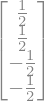

In [264]:
start_state.subs({α1:0, β1:1, α2:1, β2:0})

In [265]:
from UnitaryFunction import buildUnitaryMatrix, format_matrice
def f1(a): return False
def f2(a): return not a
def f3(a): return a
def f4(a): return True
Uf_1 = buildUnitaryMatrix(f1)
print(format_matrice(Uf_1))
Uf_2 = buildUnitaryMatrix(f2)
print(format_matrice(Uf_2))
Uf_3 = buildUnitaryMatrix(f3)
print(format_matrice(Uf_3))
Uf_4 = buildUnitaryMatrix(f4)
print(format_matrice(Uf_4))


Uf_1 =
1, 0, 0, 0,
0, 1, 0, 0,
0, 0, 1, 0,
0, 0, 0, 1
Uf_2 =
0, 0, 1, 0,
0, 1, 0, 0,
1, 0, 0, 0,
0, 0, 0, 1
Uf_3 =
1, 0, 0, 0,
0, 0, 0, 1,
0, 0, 1, 0,
0, 1, 0, 0
Uf_4 =
0, 0, 1, 0,
0, 0, 0, 1,
1, 0, 0, 0,
0, 1, 0, 0


In [266]:
end_state =TensorProduct(I,H)*Uf_1*TensorProduct(H*ψ1, H*ψ2)

In [267]:
sp.simplify(end_state) #.subs({α1:0, β1:1, α2:1, β2:0})

⎡√2⋅α₂⋅(α₁ + β₁)⎤
⎢───────────────⎥
⎢       2       ⎥
⎢               ⎥
⎢√2⋅β₂⋅(α₁ + β₁)⎥
⎢───────────────⎥
⎢       2       ⎥
⎢               ⎥
⎢√2⋅α₂⋅(α₁ - β₁)⎥
⎢───────────────⎥
⎢       2       ⎥
⎢               ⎥
⎢√2⋅β₂⋅(α₁ - β₁)⎥
⎢───────────────⎥
⎣       2       ⎦

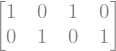

In [268]:
from sympy.physics.quantum.dagger import Dagger
Measure1over2=Dagger(TensorProduct(Matrix([1, 1]), I))
Measure2over2=Dagger(TensorProduct(I, Matrix([1, 1])))
Measure1over2

In [269]:
#Matrix([[ 1, 0, 1, 0],
#              [ 0, 1, 0, 1]])*
Res = TensorProduct(I,H)*Uf_1*TensorProduct(H*ψ1, H*ψ2)
sp.simplify(Res)# .subs({α1:0, β1:1, α2:1, β2:0})


⎡√2⋅α₂⋅(α₁ + β₁)⎤
⎢───────────────⎥
⎢       2       ⎥
⎢               ⎥
⎢√2⋅β₂⋅(α₁ + β₁)⎥
⎢───────────────⎥
⎢       2       ⎥
⎢               ⎥
⎢√2⋅α₂⋅(α₁ - β₁)⎥
⎢───────────────⎥
⎢       2       ⎥
⎢               ⎥
⎢√2⋅β₂⋅(α₁ - β₁)⎥
⎢───────────────⎥
⎣       2       ⎦

In [257]:
def measureAmongst2(idx, vect):
    if (idx==1) : projection = Dagger(TensorProduct(Matrix([1, 1]), I))
    if (idx==2) : projection = Dagger(TensorProduct(I, Matrix([1, 1])))
    M=projection*sp.Abs(vect)
    return sp.simplify((1/M.norm())*(M))

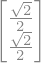

In [273]:
measureAmongst2(2, TensorProduct(I,H)*Uf_2*TensorProduct(H*ψ1, H*ψ2)).subs({α1:0, β1:1, α2:1, β2:0})

In [227]:

sp.simplify(Abs(Res))

⎡√2⋅│α₂⋅(α₁ + β₁)│⎤
⎢─────────────────⎥
⎢        2        ⎥
⎢                 ⎥
⎢√2⋅│β₂⋅(α₁ + β₁)│⎥
⎢─────────────────⎥
⎢        2        ⎥
⎢                 ⎥
⎢√2⋅│α₂⋅(α₁ - β₁)│⎥
⎢─────────────────⎥
⎢        2        ⎥
⎢                 ⎥
⎢√2⋅│β₂⋅(α₁ - β₁)│⎥
⎢─────────────────⎥
⎣        2        ⎦

In [238]:
M=Measure1over2*Abs(Res)
sp.simplify(M)

⎡√2⋅(│α₂⋅(α₁ - β₁)│ + │α₂⋅(α₁ + β₁)│)⎤
⎢────────────────────────────────────⎥
⎢                 2                  ⎥
⎢                                    ⎥
⎢√2⋅(│β₂⋅(α₁ - β₁)│ + │β₂⋅(α₁ + β₁)│)⎥
⎢────────────────────────────────────⎥
⎣                 2                  ⎦

In [239]:
sp.simplify((1/M.norm())*(M))#.subs({α1:0, β1:1, α2:1, β2:0})

⎡                      │α₂⋅(α₁ - β₁)│ + │α₂⋅(α₁ + β₁)│                       ⎤
⎢────────────────────────────────────────────────────────────────────────────⎥
⎢   _________________________________________________________________________⎥
⎢  ╱                                  2                                    2 ⎥
⎢╲╱  (│α₂⋅(α₁ - β₁)│ + │α₂⋅(α₁ + β₁)│)  + (│β₂⋅(α₁ - β₁)│ + │β₂⋅(α₁ + β₁)│)  ⎥
⎢                                                                            ⎥
⎢                      │β₂⋅(α₁ - β₁)│ + │β₂⋅(α₁ + β₁)│                       ⎥
⎢────────────────────────────────────────────────────────────────────────────⎥
⎢   _________________________________________________________________________⎥
⎢  ╱                                  2                                    2 ⎥
⎣╲╱  (│α₂⋅(α₁ - β₁)│ + │α₂⋅(α₁ + β₁)│)  + (│β₂⋅(α₁ - β₁)│ + │β₂⋅(α₁ + β₁)│)  ⎦

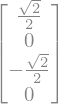

In [195]:
ResN=Res.subs({α1:0, β1:1, α2:1, β2:0})
ResN

In [200]:
Measure1over2=Matrix([[ 1, 0, 1, 0],
                      [ 0, 1, 0, 1]])
Measure1over2*ResN

In [189]:
sp.simplify(Measure1over2*TensorProduct(I,H)*Uf_2*TensorProduct(H*ψ1, H*ψ2))# .subs({α1:0, β1:1, α2:1, β2:0})

⎡√2⋅α₁⋅α₂⎤
⎢        ⎥
⎣√2⋅α₁⋅β₂⎦

In [180]:
V=sp.simplify(Matrix([
    Matrix([TensorProduct(I,H)*Uf_1*TensorProduct(H*ψ1, H*ψ2)]).T,
    Matrix([TensorProduct(I,H)*Uf_2*TensorProduct(H*ψ1, H*ψ2)]).T,
    Matrix([TensorProduct(I,H)*Uf_3*TensorProduct(H*ψ1, H*ψ2)]).T,
    Matrix([TensorProduct(I,H)*Uf_4*TensorProduct(H*ψ1, H*ψ2)]).T,
]).T)
sp.simplify(V)# .subs({α1:0, β1:1, α2:1, β2:0})

⎡√2⋅α₂⋅(α₁ + β₁)  √2⋅(α₁⋅α₂ - β₁⋅β₂)  √2⋅(α₁⋅α₂ + β₁⋅β₂)  √2⋅α₂⋅(α₁ - β₁)⎤
⎢───────────────  ──────────────────  ──────────────────  ───────────────⎥
⎢       2                 2                   2                  2       ⎥
⎢                                                                        ⎥
⎢√2⋅β₂⋅(α₁ + β₁)  √2⋅(α₁⋅β₂ - α₂⋅β₁)  √2⋅(α₁⋅β₂ + α₂⋅β₁)  √2⋅β₂⋅(α₁ - β₁)⎥
⎢───────────────  ──────────────────  ──────────────────  ───────────────⎥
⎢       2                 2                   2                  2       ⎥
⎢                                                                        ⎥
⎢√2⋅α₂⋅(α₁ - β₁)  √2⋅(α₁⋅α₂ + β₁⋅β₂)  √2⋅(α₁⋅α₂ - β₁⋅β₂)  √2⋅α₂⋅(α₁ + β₁)⎥
⎢───────────────  ──────────────────  ──────────────────  ───────────────⎥
⎢       2                 2                   2                  2       ⎥
⎢                                                                        ⎥
⎢√2⋅β₂⋅(α₁ - β₁)  √2⋅(α₁⋅β₂ + α₂⋅β₁)  √2⋅(α₁⋅β₂ - α₂⋅β₁)  √2⋅β₂⋅(α₁ + β₁)⎥
⎢───────────────  ───────

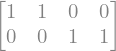

In [99]:
Matrix([[ 1, 1, 0, 0],
        [ 0, 0, 1, 1]])

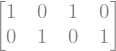

In [88]:
Matrix([[ 1, 0, 1, 0],
        [ 0, 1, 0, 1]])